<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px; margin-bottom: 2vh'>
    
# Session 05 - Project Notebook


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## Analysing Olympic Trends 
    
You vote, we deliver: Today, we'll take a closer look at the Olympics. We'll first perform some exploratory data analysis on the history of the olympics before we transition to some ML tasks
    


In [1]:
# import all potential libraries you might want to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Load the data into a data frame

You'll find the dataset we need for today in `data/olympics.csv`. Then check out the first few rows, and also make use of the `value_counts()` method to get a better sense of the data.

In [2]:
# Load the data into a dataframe named df_olympics
df_olympics = pd.read_csv("data/olympics.csv")
df_olympics

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8
...,...,...,...,...,...,...,...,...
2389,W,Triple Jump Women,Athens,2004,S,Hrysopiyi DEVETZI,GRE,15.25
2390,W,Triple Jump Women,Athens,2004,B,Tatyana LEBEDEVA,RUS,15.14
2391,W,Triple Jump Women,Atlanta,1996,G,Inessa KRAVETS,UKR,15.33
2392,W,Triple Jump Women,Atlanta,1996,S,Inna LASOVSKAYA,RUS,14.98


In [3]:
# value_counts
df_olympics.value_counts("Event")

Event
Marathon Men                84
100M Men                    82
1500M Men                   81
800M Men                    81
110M Hurdles Men            80
400M Men                    80
200M Men                    78
Decathlon Men               76
400M Hurdles Men            75
3000M Steeplechase Men      72
4X400M Relay Men            71
5000M Men                   69
10000M Men                  69
4X100M Relay Men            67
Long Jump Men               63
High Jump Men               62
100M Women                  60
Discus Throw Men            60
4X100M Relay Women          60
Shot Put Men                60
Pole Vault Men              59
50Km Race Walk Men          57
Triple Jump Men             54
Hammer Throw Men            54
Discus Throw Women          53
200M Women                  51
Javelin Throw Men           50
Javelin Throw Women         50
20Km Race Walk Men          48
High Jump Women             45
800M Women                  45
Shot Put Women              41
40

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Filter the data!
    
Now pick an event & filter the dataset. We want you to perform a historical analysis of just that event!

In [4]:
# Filter data for 100M Men event and reset the index
df_100m_men = df_olympics[df_olympics["Event"] == "100M Men"].reset_index(drop=True)

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Ensure correct data types
    
Since you are most likely use year and results, you probably wanna make sure that these can be treated as continuous variables.

In [5]:
df_100m_men['Result'] = pd.to_numeric(df_100m_men['Result'], errors='coerce')
df_100m_men['Year'] = pd.to_numeric(df_100m_men['Year'], errors='coerce')

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Come up with ideas & metrics

Come up with some meaningful metrics to explore historical data (wins by nation, athlete that won the most medals, winning times over time, etc.)

In [6]:
# Calculate the top 10 historic medalists
medal_points = {'G': 3, 'S': 2, 'B': 1} # point system for medals
df_100m_men['Points'] = df_100m_men['Medal'].map(medal_points) # new series in the dataframe
top_medalists = df_100m_men.groupby('Name')['Points'].sum().sort_values(ascending=False).head(10)

# Calculate top nations throughout all Olympics
top_nations = df_100m_men.groupby('Nationality')['Points'].sum().sort_values(ascending=False)

# Calculate average and winning times for each Olympics
average_times = df_100m_men.groupby('Year')['Result'].mean().sort_index()
winning_times = df_100m_men[df_100m_men['Medal'] == 'G'].set_index('Year')['Result'].sort_index()

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Plot results!

Plot the results using the gridspec layout as provided in the lab manual

/var/folders/mx/0b16wfr53njdysv5__hqn7kh0000gp/T/ipykernel_41259/2809477792.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


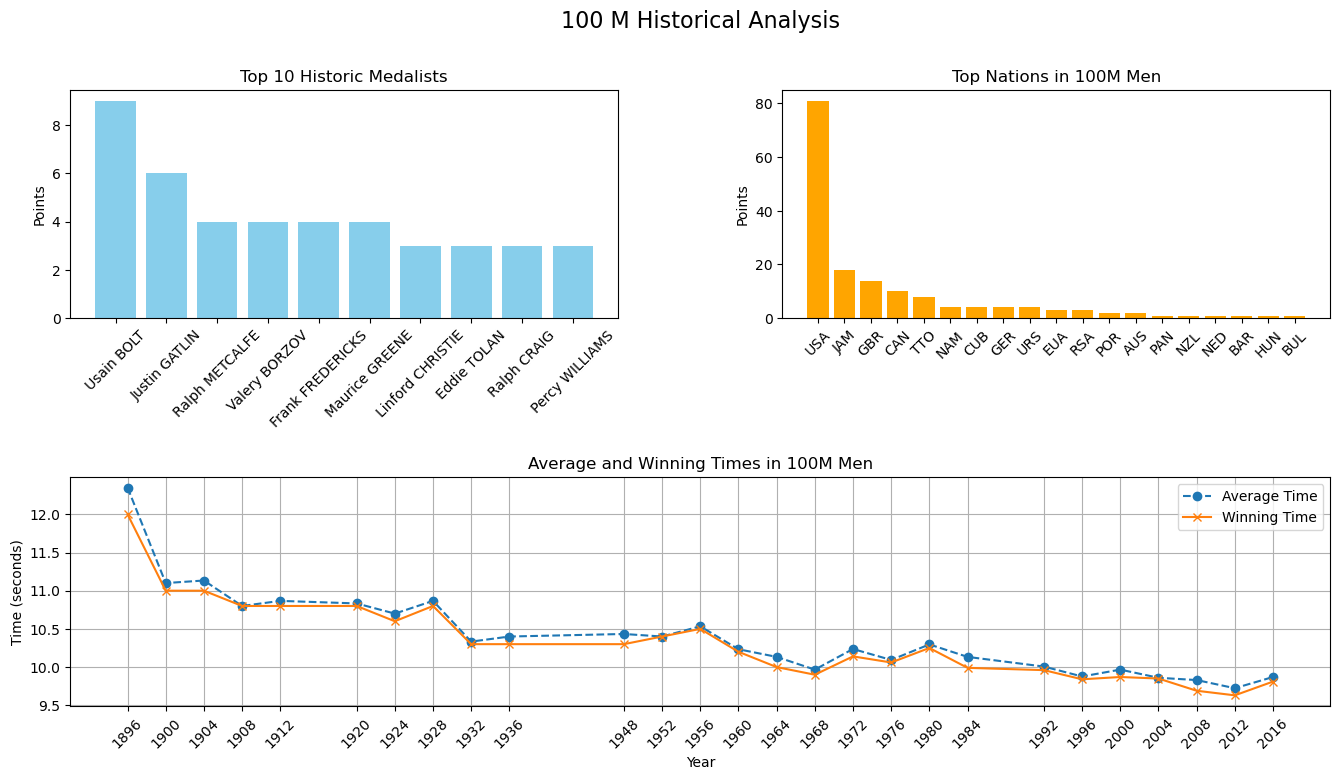

In [39]:

# Plotting the results using a custom gridspec layout!!!
fig = plt.figure(figsize=(14, 8), facecolor='#ffffff')
gs = fig.add_gridspec(nrows=5, ncols=2, left=0.05, right=0.95, hspace=0.3, wspace=0.3) #important for syntax!

# Top left plot
ax0 = fig.add_subplot(gs[0:2, 0])
ax0.bar(top_medalists.index, top_medalists.values, color='skyblue')
ax0.set_title('Top 10 Historic Medalists')
ax0.set_ylabel('Points')
ax0.tick_params(axis='x', rotation=45)

# Top right plot
ax1 = fig.add_subplot(gs[0:2, 1])
ax1.bar(top_nations.index, top_nations.values, color='orange')
ax1.set_title('Top Nations in 100M Men')
ax1.set_ylabel('Points')
ax1.tick_params(axis='x', rotation=45)

# Bottom plot spanning both columns
ax2 = fig.add_subplot(gs[3:, :])
ax2.plot(average_times.index, average_times.values, label='Average Time', marker='o', linestyle='--')
ax2.plot(winning_times.index, winning_times.values, label='Winning Time', marker='x')
ax2.set_title('Average and Winning Times in 100M Men')
ax2.set_xlabel('Year')
ax2.set_ylabel('Time (seconds)')
ax2.legend()
ax2.grid(True)
ax2.set_xticks(sorted(df_100m_men['Year'].unique()))
ax2.set_xticklabels(sorted(df_100m_men['Year'].unique()), rotation=45)

fig.suptitle('100 M Historical Analysis', fontsize=16)

plt.tight_layout()
plt.show()



<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## 2. ML

<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
df_winners = df_100m_men[df_100m_men['Medal'] == 'G']

# grab X & Y
X = df_winners[['Year']].values
y = df_winners['Result'].values

# Train the linear regression model
model = LinearRegression() # specify the 'type' of model
model.fit(X, y)

# Predict the winning time for the 2024 Olympics
year_2024 = np.array([[2024]])
predicted_time_2024 = model.predict(year_2024)

In [ ]:
predicted_time_2024

In [13]:
df_winners['Year'].values

array([2016, 2008, 2000, 1992, 1984, 1976, 1968, 1960, 1952, 1936, 1928,
       1920, 1908, 1900, 2012, 2004, 1996, 1980, 1972, 1964, 1956, 1948,
       1932, 1924, 1912, 1904, 1896])

/var/folders/mx/0b16wfr53njdysv5__hqn7kh0000gp/T/ipykernel_41259/894403317.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


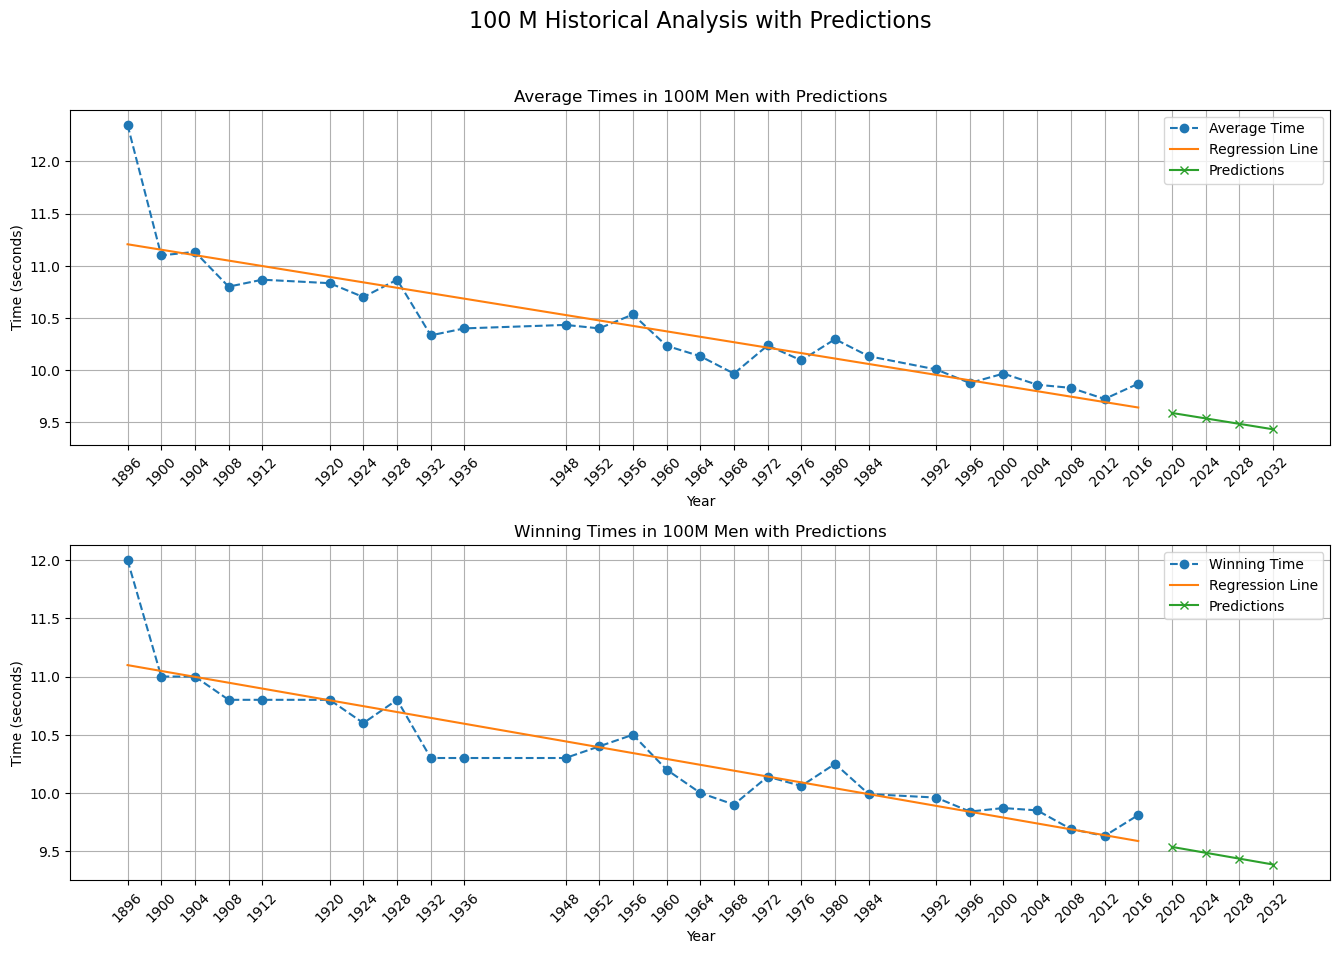

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Predictions for the next four years
future_years = np.array([2020, 2024, 2028, 2032]).reshape(-1, 1)

# Linear regression for average times
avg_model = LinearRegression()
avg_model.fit(average_times.index.values.reshape(-1, 1), average_times.values)
avg_pred = avg_model.predict(future_years)

# Linear regression for winning times
win_model = LinearRegression()
win_model.fit(winning_times.index.values.reshape(-1, 1), winning_times.values)
win_pred = win_model.predict(future_years)

# Create a dataframe to display the predictions
predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Average Time': avg_pred,
    'Predicted Winning Time': win_pred
})

# Plotting the results using a custom gridspec layout
fig = plt.figure(figsize=(14, 10), facecolor='#ffffff')
gs = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.95, hspace=0.3, wspace=0.3)

# Bottom left plot with average times and regression
ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(average_times.index, average_times.values, label='Average Time', marker='o', linestyle='--')
ax2.plot(average_times.index, avg_model.predict(average_times.index.values.reshape(-1, 1)), label='Regression Line')
ax2.plot(future_years, avg_pred, label='Predictions', marker='x')
ax2.set_title('Average Times in 100M Men with Predictions')
ax2.set_xlabel('Year')
ax2.set_ylabel('Time (seconds)')
ax2.legend()
ax2.grid(True)
ax2.set_xticks(np.append(average_times.index.values, future_years.flatten()))
ax2.set_xticklabels(np.append(average_times.index.values, future_years.flatten()), rotation=45)

# Bottom right plot with winning times and regression
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(winning_times.index, winning_times.values, label='Winning Time', marker='o', linestyle='--')
ax3.plot(winning_times.index, win_model.predict(winning_times.index.values.reshape(-1, 1)), label='Regression Line')
ax3.plot(future_years, win_pred, label='Predictions', marker='x')
ax3.set_title('Winning Times in 100M Men with Predictions')
ax3.set_xlabel('Year')
ax3.set_ylabel('Time (seconds)')
ax3.legend()
ax3.grid(True)
ax3.set_xticks(np.append(winning_times.index.values, future_years.flatten()))
ax3.set_xticklabels(np.append(winning_times.index.values, future_years.flatten()), rotation=45)

# Adding a main title for the figure
fig.suptitle('100 M Historical Analysis with Predictions', fontsize=16)

# Adjusting the layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [27]:
avg_model.predict(np.array([[1944]]))

array([10.58040037])